### Triton sweepfunctions at t11

In [1]:
from qcodes.dataset import Measurement, initialise_or_create_database_at
from qcodes.dataset.experiment_container import load_or_create_experiment, Experiment
from qcodes.dataset.plotting import plot_by_id
from qcodes.parameters import Parameter
from time import sleep
from qcodes import Station
import qcodes as qc
import numpy as np
from qcodes.dataset.data_set import load_by_id

import sys
sys.path.append('C://Users//Triton11acq//Documents//TritonDriver//TritonDriver//qcodes//instrument_drivers//oxford')
from triton import OxfordTriton
t11 = OxfordTriton("t11", address="10.209.64.175", port=33576)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s


In [2]:
data_path = 'C:\\Users\\Triton11acq\\Documents\\TritonDriver\\Triton'
qc.config['core']['db_location'] = data_path
qc.config['user']['mainfolder'] = data_path 
initialise_or_create_database_at(data_path + '\\SweepfunctionsTest.db')
exp = load_or_create_experiment("Sweepfunctions", sample_name="0")

scfg = Station(config_file='A:\\Networks Experiments\\Code\\station.yaml', use_monitor=True)
lockin_2 = scfg.load_instrument('lockin_2')
keith = scfg.load_instrument('keith')

c:\Users\Triton11acq\miniconda3\envs\qcodes39\lib\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch1_databuffer on instrument lockin_2 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
c:\Users\Triton11acq\miniconda3\envs\qcodes39\lib\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch2_databuffer on instrument lockin_2 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(


Connected to: Stanford_Research_Systems SR830 (serial:s/n49067, firmware:ver1.07) in 0.18s


#### Parameter check

In [5]:
#temperature
for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ': ' + str(eval(f"t11.{ch}()")))

T1: 3.4372
T2: 4.07234
T3: 148.057
T4: 0.0870046
T5: 322.471
T6: 43.1037
T7: 55.2004
T8: 0.0152884
T9: 0.0499765
T10: 291.456
T11: 287.167
T12: 0.0
T13: 4.19819
T14: 0.0
T15: 0.0
T16: 0.0


In [6]:
#get thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ' state: ' + eval(f"t11.{ch}_state()"))

T1 state: on
T2 state: on
T3 state: on
T4 state: on
T5 state: on
T6 state: on
T7 state: on
T8 state: on
T9 state: off
T10 state: off
T11 state: off
T12 state: off
T13 state: on
T14 state: off
T15 state: off
T16 state: off


In [7]:
t11.T13_state('off')
t11.T13_state()

'off'

In [8]:
t11.T13()

4.19819

In [9]:
t11.T13_state('on')
t11.T13_state()

'on'

In [10]:
#set thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    eval(f"t11.{ch}_state('off')")

for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ' state: ' + eval(f"t11.{ch}_state()"))

T1 state: off
T2 state: off
T3 state: off
T4 state: off
T5 state: off
T6 state: off
T7 state: off
T8 state: off
T9 state: off
T10 state: off
T11 state: off
T12 state: off
T13 state: off
T14 state: off
T15 state: off
T16 state: off


In [11]:
#set thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    eval(f"t11.{ch}_state('on')")

In [22]:
#get pump speed
t11.turb1_speed()

820.0

In [29]:
#get pump state
for pump in ['TURB1', 'COMP']:
    print(eval(f't11.{pump.lower()}_state()'))

on
on


In [33]:
# get heater range
t11.pid_range()

0.316

In [35]:
# set heater range
t11.pid_range(0.316)

In [36]:
# temperature control
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.0, 20.0, 0.0)

In [37]:
# temperature control
t11.pid_p(11.), t11.pid_i(21.), t11.pid_d(0.1)
t11.pid_p(), t11.pid_i(), t11.pid_d()

(11.0, 21.0, 0.1)

In [38]:
t11.pid_p(10.), t11.pid_i(20.), t11.pid_d(0.)
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.0, 20.0, 0.0)

In [39]:
# temperature control
t11.pid_setpoint()

0.0

In [40]:
# temperature control
t11.pid_setpoint(t11.pid_setpoint())

#### T-sweep functions test

In [3]:
from sweepfunction import Temperature, live_configurator, _toggle_turbo, _get_best_heater_range, _set_heater_range, _set_temp_setpoint, magnet_check, _set_pid_controller, _set_active_channels, _init_sweep_state, _close

In [4]:
# Temperature channel
ch_t_mc = 8
t_mc = Temperature('T_mc', t11, ch_t_mc)

In [44]:
# Basic functionality
_close(t_mc(), setpoint=0.1, tolerance=0.0001), _close(t_mc(), setpoint=t_mc() + 0.01, tolerance=0.1)

(False, True)

In [5]:
# Basic functionality
ch_t_magnet = 13
magnet_check(t11, ch_t_magnet)

4.21314

In [6]:
# Heater control
for temp in t11._heater_range_temp:
    t = temp - 0.001
    print(f"T = {t}")
    print('Heater range: ', _get_best_heater_range(t11._heater_range_temp, t11._heater_range_curr, t))

T = 0.028999999999999998
Heater range:  1
T = 0.099
Heater range:  3.16
T = 0.299
Heater range:  10
T = 0.999
Heater range:  31.6
T = 11.999
Heater range:  100
T = 39.999
Heater range:  None


In [9]:
# Heater control
print(t11.pid_range())
_set_heater_range(t11, t_mc, 0.316, t11.pid_range())

0.316


0.316

In [14]:
# Heater control
print(t11.pid_range())
_set_heater_range(t11, t_mc, 1, t11.pid_range()), t11.pid_range()

0.316


(1, 1.0)

In [15]:
t11.pid_range(0.316)

In [16]:
# PID
_set_pid_controller(t11, pid_values=(10.1, 20.1, 0.1))
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.1, 20.1, 0.1)

In [17]:
# PID
_set_pid_controller(t11, pid_values=(10., 20., 0.))
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.0, 20.0, 0.0)

In [19]:
# Temperature channels
ch_t_mc = 8
ch_t_magnet = 13
_set_active_channels(t11, ch_t_mc, ch_t_magnet)

In [20]:
#get thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ' state: ' + eval(f"t11.{ch}_state()"))

T1 state: off
T2 state: off
T3 state: off
T4 state: off
T5 state: off
T6 state: off
T7 state: off
T8 state: on
T9 state: off
T10 state: off
T11 state: off
T12 state: off
T13 state: on
T14 state: off
T15 state: off
T16 state: off


In [24]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'off'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() + 0.01
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    #_toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 1. 


([<AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

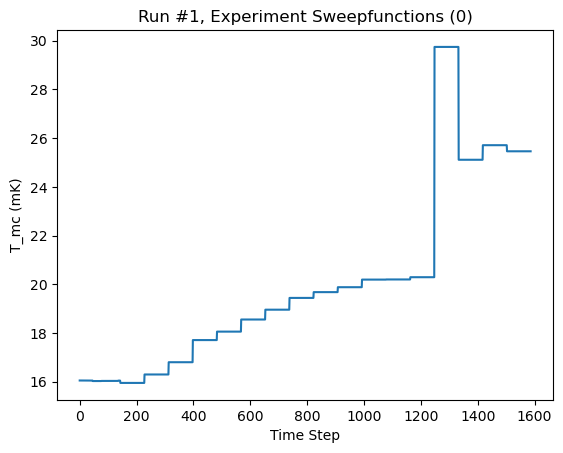

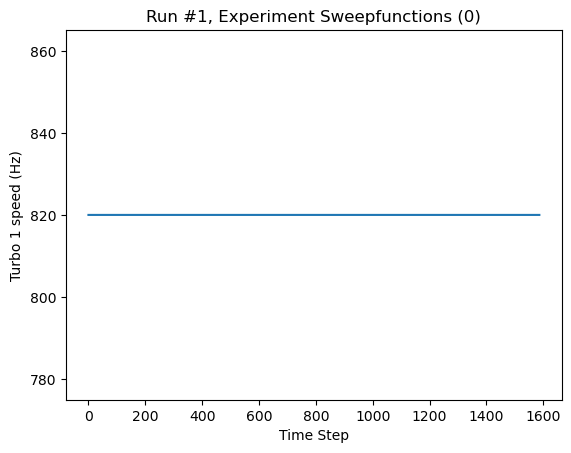

In [27]:
plot_by_id(1)

In [7]:
t11.pid_setpoint(0.55)

In [13]:
t_mc()

0.553611

In [14]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'off'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() + 0.1
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    _toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint, tolerance=0.0005):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 2. 


2023-07-31 12:02:56,251 - Temperature Sweep                               - INFO - Turbo 1 has been switched offat T = 0.550975 K


([<AxesSubplot: title={'center': 'Run #2, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #2, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

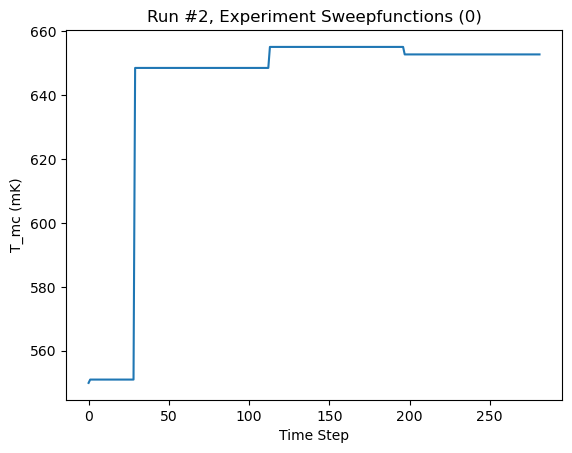

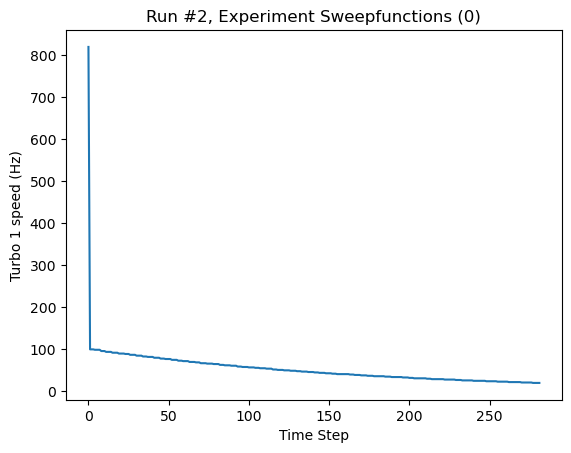

In [15]:
plot_by_id(2)

In [5]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'on'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() - 0.1
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    _toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 4. 


2023-07-31 12:12:32,106 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.616936 K


([<AxesSubplot: title={'center': 'Run #4, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #4, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

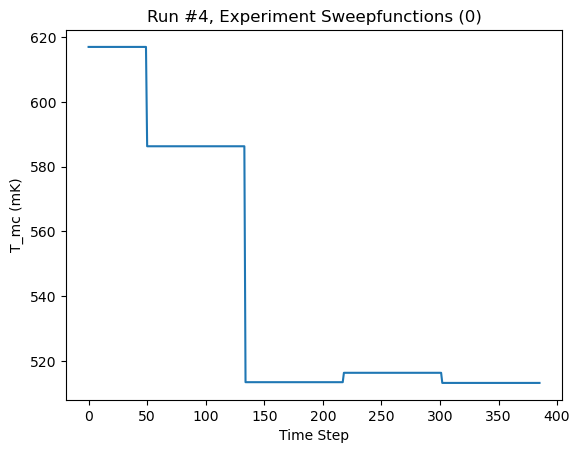

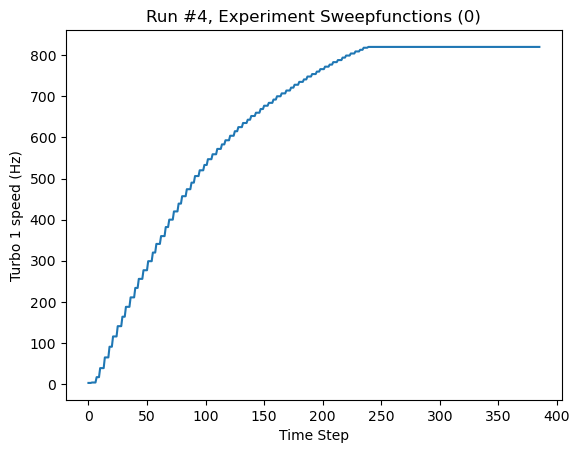

In [6]:
plot_by_id(4)

In [7]:
# cryostat control
t11.pid_setpoint(0.29)

In [12]:
_get_best_heater_range(t11._heater_range_temp, t11._heater_range_curr, 0.31)

31.6

In [9]:
# cryostat control
print(t11.turb1_state(), t11.pid_range())
future_setpoint = 0.31
t11.pid_setpoint(future_setpoint)
live_configurator(t11, t_mc, future_setpoint, t11.pid_range(), t11.turb1_state())
print(t11.turb1_state(), t11.pid_range())

on 10.0
on 31.6


In [10]:
# cryostat control
t11.pid_setpoint(0.75)

In [5]:
# cryostat control
print(t11.turb1_state(), t11.pid_range())
future_setpoint = 0.79
t11.pid_setpoint(future_setpoint)
live_configurator(t11, t_mc, future_setpoint, t11.pid_range(), t11.turb1_state())
print(t11.turb1_state(), t11.pid_range())

on 31.6


2023-07-31 13:34:31,870 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.791326 K


off 31.6


In [6]:
# Temperature control
future_setpoint = 0.09
_set_temp_setpoint(
    t11, 
    t_mc, 
    future_setpoint, 
    magnet_active=True, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=t11.pid_range(),
)

2023-07-31 13:44:41,615 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.700358 K
2023-07-31 13:51:56,215 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.232905 K.
2023-07-31 13:56:17,021 - Temperature Sweep                               - INFO - Heater range changed to 3.16 mA at T = 0.0895501 K.


('on', 3.16)

In [5]:
# cryostate control
_init_sweep_state(t11, ch_t_mc, 13, False, pid=(20., 10., 0.))

8


('on', 3.16)

In [6]:
# Temperature control
future_setpoint = 0.8
_set_temp_setpoint(
    t11, 
    t_mc, 
    future_setpoint, 
    magnet_active=False, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=t11.pid_range(),
)

2023-07-31 14:11:55,433 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.800713 K


('off', 31.6)

#### Temperature sweeps

In [4]:
from sweepfunction import T1dMeasurement, T2dMeasurement

In [9]:
# Temperature control
future_setpoint = 0.25
_set_temp_setpoint(
    t11, 
    t_mc, 
    future_setpoint, 
    magnet_active=True, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=t11.pid_range(),
)

('on', 10)

In [5]:
param_meas = [lockin_2.A2_XX1_X, lockin_2.A2_XX1_P]

In [8]:
for param in param_meas:
    print(param())

1.0175799999999999e-06
-1.764


In [12]:
(1.1-0.25)/41

0.020731707317073172

In [10]:
_set_pid_controller(t11, (20., 10., 0.))

In [11]:
# test sweeping up through turbo and heater transition
T1dMeasurement(
    t11,
    0.25,
    1.1,
    41,
    1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

Starting experimental run with id: 7. 


An exception occured in measurement with guid: aaaaaaaa-0c00-0016-0000-0189abf78725;
Traceback:
Traceback (most recent call last):
  File "c:\Users\Triton11acq\Documents\TritonDriver\Triton\sweepfunction.py", line 89, in T1dMeasurement
    sleep(0.5)
KeyboardInterrupt



KeyboardInterrupt: 

In [ ]:
plot_by_id(7)

In [ ]:
import numpy as np
from qcodes.dataset.data_set import load_by_id

In [ ]:
data1 = load_by_id(7)

In [ ]:
np.linspace(0.25, 1.1, 41)
data1.

In [ ]:
# test sweeping down through turbo and heater transition
T1dMeasurement(
    t11,
    1.1,
    0.7,
    21,
    1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

In [ ]:
plot_by_id()

In [ ]:
# test sweeping up through turbo and heater transition; 2D scan
T2dMeasurement(
    t11,
    0.7,
    1.1,
    21,
    1,
    keith.Bperp,
    0,
    10e-3,
    21,
    0.1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

In [ ]:
keith.Bperp()

In [ ]:
# test sweeping down through turbo and heater transition; 2D scan
T2dMeasurement(
    t11,
    1.1,
    0.7,
    21,
    1,
    keith.Bperp,
    0,
    10e-3,
    21,
    0.1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)